In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [3]:
# X = pd.read_csv('./Training Data/Linear_X_Train.csv').values
# y = pd.read_csv('./Training Data/Linear_Y_Train.csv').values.reshape(-1)
# print(X.shape,y.shape)

In [4]:
X,y = make_regression(n_samples=1000,n_features=1,n_informative=1,n_targets=1,noise=3,random_state=42)

In [5]:
print(X.shape,y.shape)

(1000, 1) (1000,)


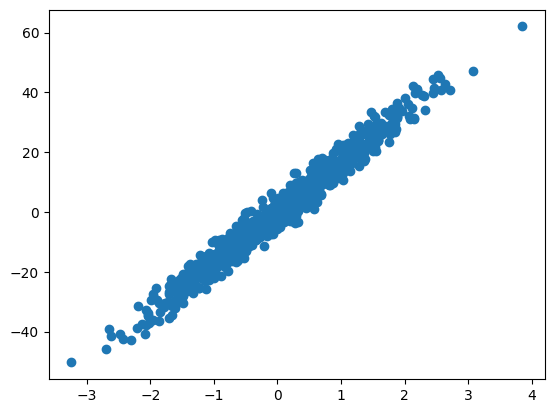

In [6]:
plt.scatter(X,y)
plt.show()

In [7]:
def hypothesis(x,w,w0):
    # return np.sum(w*x,axis = 1)+w0
    return w@x.T+w0

In [8]:
hypothesis(np.array([[1,2],[2,3],[3,4],[4,5]]),[2,1],0)

array([ 4,  7, 10, 13])

In [9]:
w = [2]
w0 = 1

In [10]:
def loss(x,w,w0,y):
    ypred = hypothesis(x,w,w0)
    return np.mean((ypred-y)**2)

In [11]:
loss(X,w,w0,y)

216.6981615390189

In [12]:
def gradientDescent(X,y,lr = 0.01,epochs = 100):
    w = np.zeros(shape=(X.shape[1],))
    w0 = 1
    for e in range(epochs):
        ypred = hypothesis(X,w,w0)
        # grads = []
        # for j in range(X.shape[1]):
        #     grads.append(np.mean((ypred-y)*X[:,j]))

        grads = ((ypred-y)@X)/X.shape[0]

        w = w - lr*np.array(grads)
        w0 = w0 - lr*np.mean((ypred-y))
    return w,w0

In [13]:
w,w0 = gradientDescent(X,y,lr = 0.05,epochs=10000)

In [14]:
w

array([16.71384457])

In [15]:
w0

0.013578617717463154

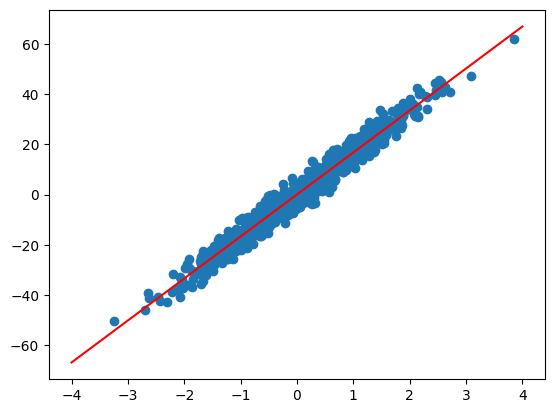

In [16]:
x = np.linspace(-4,4,1000).reshape((-1,1))
plt.scatter(X,y)
plt.plot(x,hypothesis(x,w,w0),c='r')
plt.show()

In [47]:
class LinearRegression:
    def __init__(self,lr = 0.01):
        self.lr = lr
    def fit(self,X,y,epochs = 100):
        self.w, self.w0 = self.gradientDescent(X,y,self.lr,epochs)

    def hypothesis(self,x,w,w0):
        return w.dot(x.T) + w0

    def loss(self,x,w,w0,y):
        ypred = self.hypothesis(x,w,w0)
        return np.mean((ypred-y)**2)

    def predict(self,X):
        return self.hypothesis(X,self.w,self.w0)

    def gradientDescent(self,X,y,lr = 0.01,epochs = 100):
        w = np.zeros(shape=(X.shape[1],))
        w[0] = 0
        w0 = 0
        clf.th1 = [w[0]]
        clf.th0 = [w0]
        self.loss_e = [self.loss(X,w,w0,y)]
        for e in range(epochs):
            ypred = self.hypothesis(X,w,w0)
            i = np.random.randint(X.shape[0])
            grads = np.mean((ypred-y)*X.T,axis =1)
            
            w = w - lr*grads
            w0 = w0 - lr*np.mean(ypred-y)

            clf.th1.append(w[0])
            clf.th0.append(w0)
            
            self.loss_e.append(self.loss(X,w,w0,y))
            
        return w,w0

In [48]:
clf = LinearRegression()

In [49]:
clf.fit(X,y,epochs=1000)

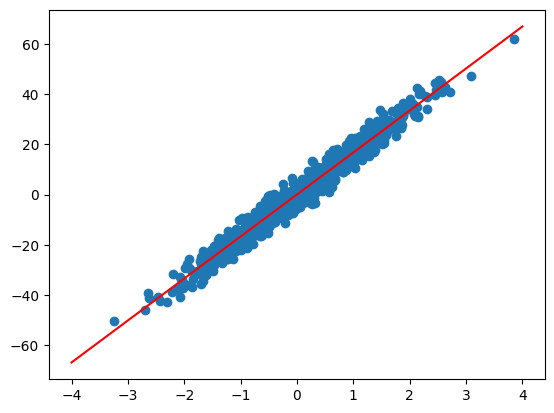

In [50]:
x = np.linspace(-4,4,1000).reshape((-1,1))
plt.scatter(X,y)
plt.plot(x,clf.predict(x),c='r')
plt.show()

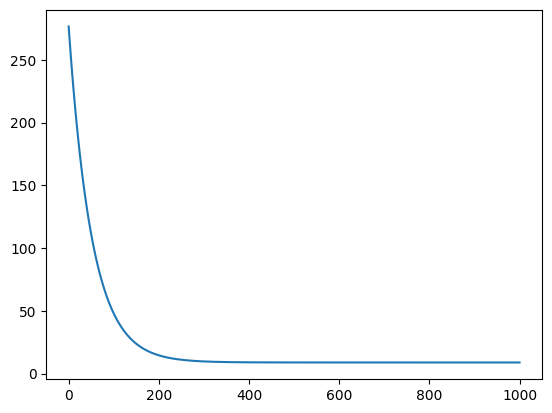

In [51]:
plt.plot(clf.loss_e)
plt.show()

In [52]:
r2_score(y,clf.predict(X))

0.9680855527709329

In [53]:
clf.w

array([16.71272673])

In [54]:
clf.w0

0.01375432228613826

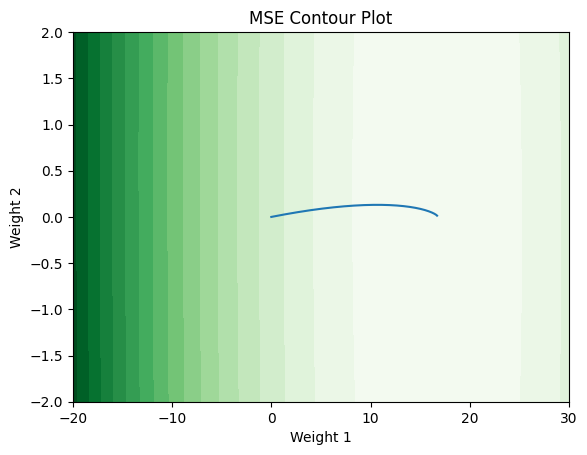

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Assume you have your data (X, y) and a trained linear regression model with weights 'w1' and 'w2' 
Xs = np.column_stack((X,np.ones_like(X)))
# Generate a grid of possible weights
w1_range = np.linspace(-20, 30, 50)
w2_range = np.linspace(-3, 6, 50)
w1_grid, w2_grid = np.meshgrid(w1_range, w2_range)

# Calculate MSE for each weight combination
mse_grid = np.zeros_like(w1_grid)
for i in range(len(w1_range)):
    for j in range(len(w2_range)):
        w1_test, w2_test = w1_grid[i, j], w2_grid[i, j]
        predicted = np.dot(Xs, [w1_test, w2_test])
        mse_grid[i, j] = mean_squared_error(y, predicted) 

# Create contour plot
plt.contourf(w1_grid, w2_grid, mse_grid, levels=20,cmap = 'Greens')
plt.plot(clf.th1,clf.th0)

plt.xlabel("Weight 1")
plt.ylabel("Weight 2")
plt.title("MSE Contour Plot")
plt.show()

In [56]:
clf.th1

[0.0,
 0.16016784055466946,
 0.318800175885972,
 0.4759117329085461,
 0.6315170972298066,
 0.7856307145064356,
 0.938266891787845,
 1.0894397988467364,
 1.2391634694968827,
 1.3874518028982532,
 1.5343185648496043,
 1.679777389068656,
 1.8238417784599743,
 1.9665251063706768,
 2.107840617834078,
 2.247801430801393,
 2.3864205373616096,
 2.5237108049496464,
 2.6596849775429092,
 2.7943556768463544,
 2.9277354034661727,
 3.0598365380722004,
 3.1906713425491695,
 3.3202519611369,
 3.448590421559542,
 3.5756986361439766,
 3.701588402927472,
 3.8262714067547066,
 3.9497592203642555,
 4.072063305464643,
 4.19319501380006,
 4.313165588205854,
 4.431986163653875,
 4.549667768287786,
 4.666221324448435,
 4.781657649689377,
 4.895987457782643,
 5.009221359714853,
 5.121369864673764,
 5.232443381025346,
 5.342452217281469,
 5.451406583058304,
 5.55931659002552,
 5.666192252846362,
 5.77204349010871,
 5.876880125247189,
 5.9807118874564305,
 6.08354841259556,
 6.185399244084006,
 6.286273833788699

In [46]:
X = np.hstack([np.ones((X.shape[0],1)),X])

In [51]:
X

array([[ 1.        , -0.28930742],
       [ 1.        , -0.58880963],
       [ 1.        ,  1.02750749],
       ...,
       [ 1.        , -0.30516366],
       [ 1.        ,  1.67583291],
       [ 1.        , -0.49175724]])

In [52]:
w = np.linalg.inv(X.T@X)@X.T@y

In [53]:
w

array([ 3.72798828, 80.54363185])

In [54]:
scale = StandardScaler()
X = scale.fit_transform(X)

In [55]:
clf = LinearRegression()
clf.fit(X,y)

LinearRegression()

In [56]:
clf.coef_

array([ 0.        , 79.90573694])

In [57]:
clf.intercept_

0.6838689680155964